In [68]:
import numpy as np
from sklearn import datasets
import networkx as nx
import matplotlib.pyplot as plt


In [69]:
rng = np.random.RandomState(1)

**Question** : Faire un jeu de données avec `make_moons` de sklearn avec un bruit de 0.15. Afficher le jeu de données

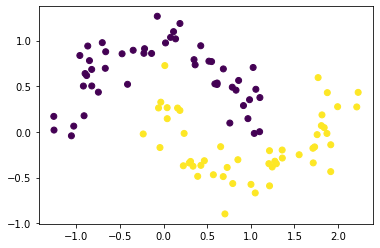

In [70]:
from sklearn.datasets import make_moons

In [71]:
Moon, labels = make_moons(noise=.15, random_state=rng)

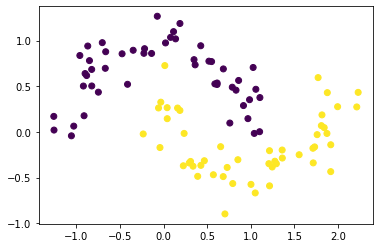

In [72]:
plt.scatter(Moon[:,0], Moon[:,1], c=labels)

**Question** avec la fonction `kneighbors_graph`, créer une matrice d'adjacence représentant ce jeu de données sous forme de Knn-graphe, pour 5 voisins. 

In [73]:
from sklearn.neighbors import kneighbors_graph

In [74]:
Mmoon = kneighbors_graph(Moon, n_neighbors=5)

**Question** La matrice est-elle symétrique ? Le graphe est-il dirigé ? Quels sont les degrés des noeuds ? (Effectuer ces calculs à partir de la matrice.)

In [75]:
np.sum(Mmoon.T != Mmoon)

240

In [76]:
print("Entrants : ", np.sum(Mmoon, axis=0))
print("Sortants : ", np.sum(Mmoon, axis=1).ravel())

Entrants :  [[7. 4. 0. 7. 2. 5. 4. 4. 5. 8. 5. 9. 6. 6. 6. 6. 5. 9. 2. 6. 3. 5. 5. 4.
  4. 5. 7. 5. 3. 8. 3. 3. 1. 7. 7. 6. 4. 2. 9. 3. 6. 6. 7. 9. 7. 8. 4. 7.
  6. 2. 8. 6. 3. 4. 1. 4. 5. 1. 6. 5. 5. 6. 6. 4. 3. 7. 4. 6. 3. 7. 8. 4.
  7. 7. 5. 4. 4. 6. 5. 5. 6. 4. 6. 4. 5. 2. 7. 8. 4. 8. 2. 6. 4. 6. 6. 3.
  5. 0. 1. 2.]]
Sortants :  [[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
  5. 5. 5. 5.]]


**Question** Tracer ce graphe
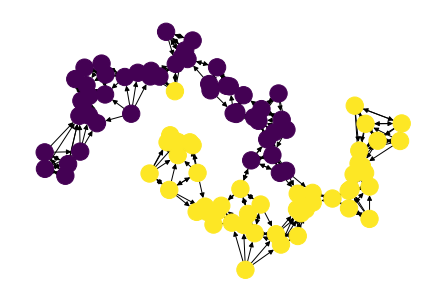

In [77]:
Gmoon = nx.DiGraph(Mmoon) 

In [78]:
Gmoon.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [79]:
pos = {i:(Moon[i,0],Moon[i,1]) for i in range(Moon.shape[0])}

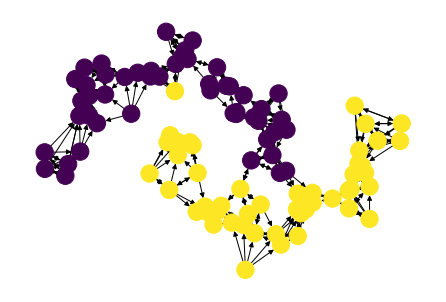

In [80]:
nx.draw(Gmoon, node_color=labels, pos=pos)

**Question** : Transformer la matrice pour la rendre symétrique. 

In [81]:
Mmoon_sym = Mmoon.T+Mmoon > 0

**Question** Afficher le graphe coorespondant et comparer avec la création d'un graphe sur la matrice non symétrique.

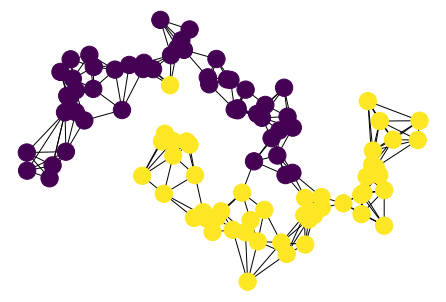

In [82]:
nx.draw(nx.Graph(Mmoon), node_color=labels, pos=pos)

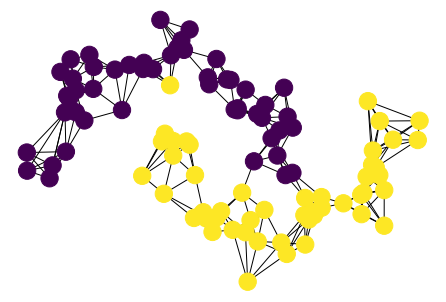

In [83]:
Gmoon_sym = nx.Graph(Mmoon_sym)
nx.draw(Gmoon_sym, node_color=labels, pos=pos)

**Question** Afficher des variantes en changeant le nombre de voisins.

In [84]:
def affiche_graphe_moon(nbvoisins):
    nx.draw(nx.Graph(kneighbors_graph(Moon, n_neighbors=nbvoisins)), 
            node_color=labels, 
            pos=pos)

In [85]:
from ipywidgets import interact

interact(affiche_graphe_moon, nbvoisins=(1,10))

interactive(children=(IntSlider(value=5, description='nbvoisins', max=10, min=1), Output()), _dom_classes=('wi…

<function __main__.affiche_graphe_moon(nbvoisins)>

# Avec le jeu de données iris...

**Question** Prenez 20 points de données distincts au hasard dans le jeu de données iris. (utilisez `unique` car une donnée de iris est dupliquée...)

In [86]:
X, y = datasets.load_iris(return_X_y=True)

In [87]:
len(X)

150

In [88]:
uniques, ind = np.unique(X, axis=0, return_index=True)

In [89]:
len(ind)

149

In [90]:
rng.shuffle(ind)
N=20
X, y = X[ind[:N]], y[ind[:N]]

**Question** En utilisant les primitives de `sklearn` pour [calculer des similarités](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_kernels.html), on calcule différentes matrices avec les noyaux suivants:

-  cosine
-  rbf avec $\gamma=1$
-  linéaire 

Utiliser aussi sklearn pour calculer la matrice des distances Euclidiennes, ajouter 1 à la diagonale puis calculer l'inverse de cette distance comme similarité.  

In [91]:
from sklearn.metrics.pairwise import euclidean_distances, pairwise_kernels 

In [92]:
metrics = ['cosine','linear','rbf', 'euclidean']
Sim = dict()
for m in metrics[:-1]:
    Sim[m] = pairwise_kernels(X, metric=m)
Sim[metrics[-1]] = 1/(np.eye(N)+euclidean_distances(X))

**Question** Observer les valeurs minimales et maximales de chaque matrice

In [93]:
for m,M in Sim.items():
    print(f"{m} min:{np.min(M)} max:{np.max(M)}" )

cosine min:0.857619311176142 max:1.0000000000000002
linear min:28.71 max:110.78999999999999
rbf min:3.1992789777689165e-05 max:1.0
euclidean min:0.1554174680400523 max:7.071067811863667


**Question** Normaliser les valeurs de ces matrices entre 1 et 5. 

In [94]:
def scale(M, a=1, b=10):
    mini, maxi = np.min(M), np.max(M)
    return  a + (b - a) * (M - mini) / (maxi - mini) 


In [95]:
for m, M in Sim.items():
    Sim[m] = scale(M, 1, 5)

**Question** Enlever la diagonale de chaque matrice

In [96]:
for M in Sim.values():
    M -= np.diag(M)   

**Question** À l'aide de [sklearn.neighbors.kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html), calculer un $k$-NN graphe en prenant $k=5$

In [97]:
from sklearn.neighbors import kneighbors_graph

In [98]:
Sim['knn'] = kneighbors_graph(X, n_neighbors=5)

**Question** Afficher les graphes correspondants

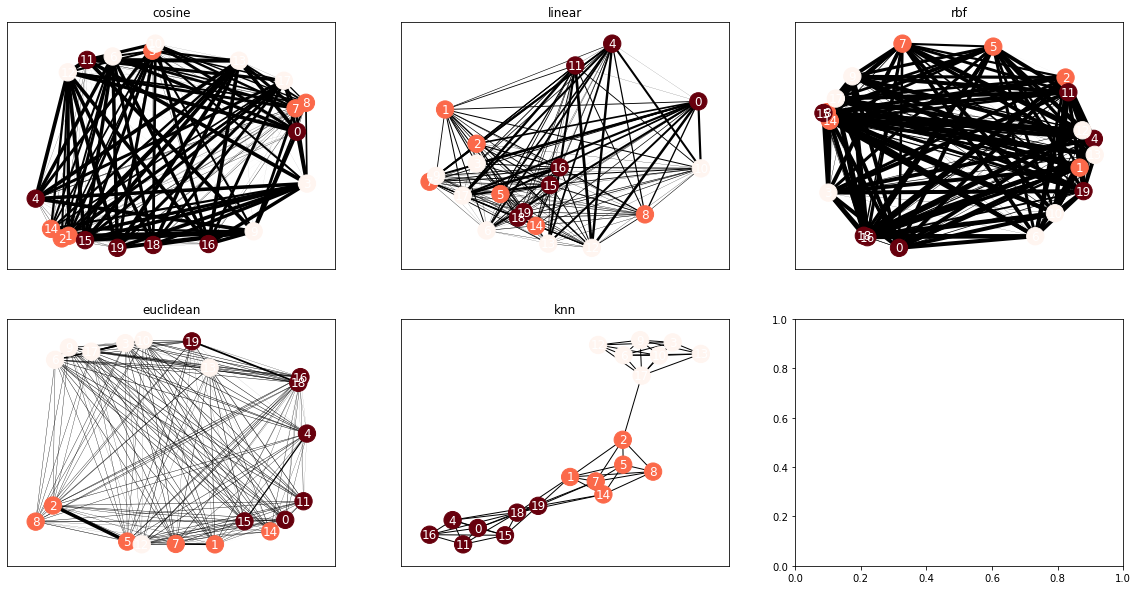

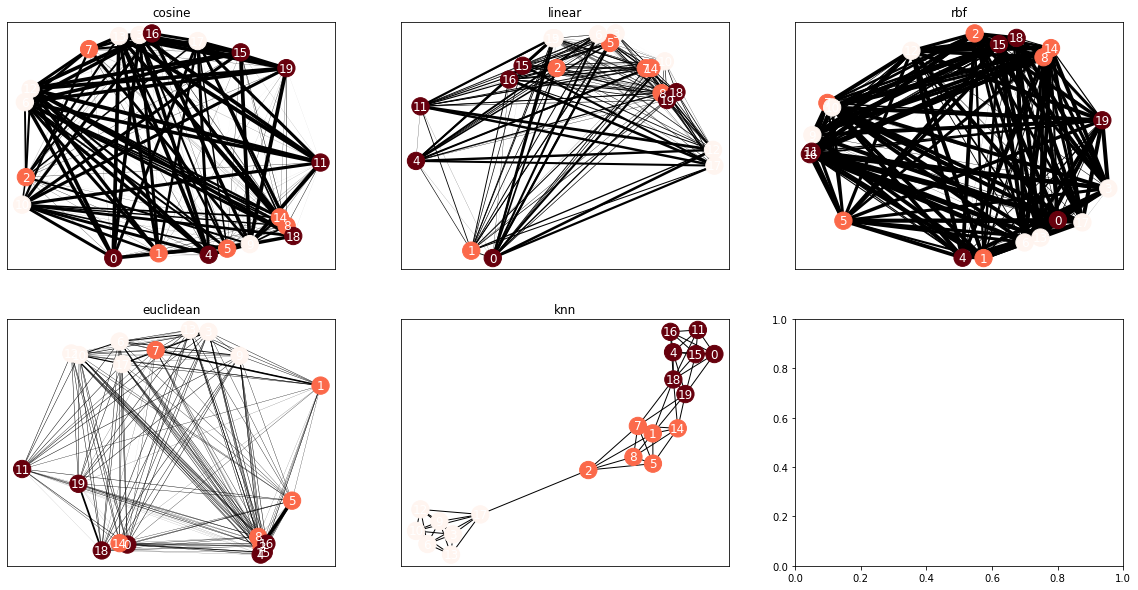

In [99]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
i=0
for name, M in Sim.items():
    G = nx.Graph(M) 
    widths = nx.get_edge_attributes(G, 'weight')
    nodelist = G.nodes()
    pos = nx.spring_layout(G)
    axis = ax.ravel()[i]
    nx.draw_networkx_nodes(G, pos,
                           nodelist=nodelist,
                           node_color=y,
                           cmap=plt.cm.Reds,
                           ax=axis)
    nx.draw_networkx_edges(G, 
                           pos,
                           edgelist = widths.keys(),
                           width=list(widths.values()),
                           ax=axis
                          )
    nx.draw_networkx_labels(G, 
                            pos=pos,
                            labels=dict(zip(nodelist,nodelist)),
                            font_color='white',
                            ax =axis
                           )    
    #options = {        "node_color": y,
        # "edge_color": colors,
        # "width": 4,
        # "cmap" : plt.cm.Reds,"with_labels": True,}
    #nx.draw(G, ax=ax.ravel()[i], **options)
    axis.set_title(name)
    i+=1
